In [1]:
%run header.ipynb

fs = 16000
N  = 1024
f0 = 50000/N
x  = np.sin(2*np.pi*(f0/fs)*(np.linspace(0,N-1,N)))
X  = fft(x)
f  = np.linspace(0,fs,N)
k  = np.linspace(0,N-1,N)




# The Discrete Fourier Transform

The frequency-domain representation gives insight into the composition of time series and hence of musical signals. In the digital domain we are formemost interested in discrete signals and will thus introduce the Discrete Fourier Transform (DFT). This section does not aim at a full introduction of the DFT, but illustrates a few aspects which help to better understand the basics of computer music and sound synthesis. 

The DFT $X[k]$ of a discrete signal $x$ with the length $N$ and the sampling frequency $f_s$ is calculated as follows. For every frequency bin $k=1 ... N, N \in \mathbb{N}$ of the output, the correlation of the signal with a complex oscillation with the frequency $2 \pi \frac{k}{N}$ is calculated:

$$
\begin{eqnarray}
X[k] & = & \sum\limits_{n=0}^{N-1} x[n] \left( \cos \left(2 \pi k \frac{n}{N}) -j \sin(2 \pi k \frac{n}{N} \right) \right)  \\
X[k] & = & \sum\limits_{n=0}^{N-1} x[n] e^{-j 2 \pi k \frac{n}{N}} 
\end{eqnarray}
$$

Since real and imaginary part of the complex oscillation have a relative phase of $\frac{\pi}{2}$, the correlation does not only deliver information on the magnitude of spectral components, but also on their phase. The real part is a cosine, whereas the imaginary part is a sine function. The following plot shows the real and imaginary component of the complex oscillations for the indices $k=1$ and $k=2$:

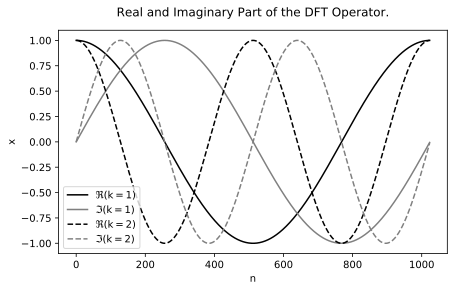

In [2]:
plt.figure()

real = np.cos(2*np.pi*(1/N)*k)
imag = np.sin(2*np.pi*(1/N)*k)
p1 = plt.plot(real,'k')
p2 = plt.plot(imag,'grey')

real = np.cos(2*np.pi*(2/N)*k)
imag = np.sin(2*np.pi*(2/N)*k)
p1 = plt.plot(real,'k', linestyle='dashed')
p2 = plt.plot(imag,'gray', linestyle='dashed')

plt.suptitle("Real and Imaginary Part of the DFT Operator.");
plt.xlabel("$n$");
plt.ylabel("$x$");

plt.legend([
    '$\\Re(k=1)$',
    '$\\Im(k=1)$',
    '$\\Re(k=2)$',
    '$\\Im(k=2)$']);



----

## DFT of a Sine Wave

In the field of musical signal processing, the sine wave (respectively the cosine wave) are the basic elements of complex sounds. They can be used to model and synthesize any periodic signal. Hence, the frequency domain representation of these harmonic functions is fundamental to the understanding of many algorithms for analysis and synthesis.
In most visualizations in the spectral domain, a sinusoidal component is shown as a single peak at the oscillation's frequency. However, when viewed closely, this peak is smeared accompanied by several side lobes. The following example derives these characteristics,
based on a $1024$ sample sine wave with a frequency of $f_0 = 100\ \mathrm{Hz}$ at a sampling rate of $f_s = 16\ \mathrm{kHz}$:

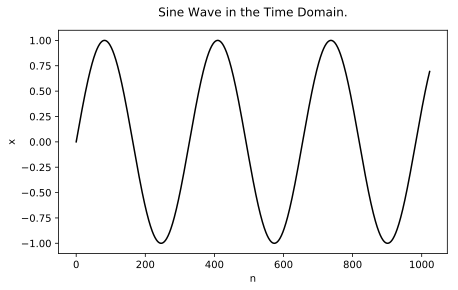

In [3]:

plt.figure()
plt.suptitle("Sine Wave in the Time Domain.");
p1 = plt.plot(x,'k')
plt.xlabel("$n$");
plt.ylabel("$x$");



For calculating the DFT of sinusoidal signals, it makes sense to express them in the complex notation through Euler's formula:

$$
\sin(2 \pi f_0 \frac{n}{fs}) = \frac{1}{2j} \left( e^{j 2 \pi f_0 \frac{n}{fs} } -e^{-j2 \pi f_0 \frac{n}{fs}} \right) \\
$$


The DFT of the sine wave thus extends to:

$$
X[k] =  \sum\limits_{n=0}^{N-1} \frac{1}{2j} \left(e^{j 2 \pi \frac{f_0}{fs} n} -e^{-j2 \pi \frac{f_0}{fs} n} \right) e^{-j 2 \pi k \frac{n}{N}} \\
$$

Solving:

$$
\begin{eqnarray}
X[k] & = & \frac{1}{2j} \sum\limits_{i=0}^{N-1} 
e^{- j 2 \pi k \frac{n}{N} + j 2 \pi \frac{f_0}{fs} n } 
- e^{- j 2 \pi k \frac{n}{N} - j 2 \pi\frac{f_0}{fs} n} \\
%
%
& = & \frac{1}{2j} \sum\limits_{i=0}^{N-1} 
e^{- j 2 \pi     (  \frac{k}{N} - \frac{f_0}{fs}    ) n }
- e^{- j 2 \pi    (   \frac{k}{N} + \frac{f_0}{fs}) n} \\
%
%
& = & \frac{1}{2j} \sum\limits_{i=0}^{N-1} 
e^{- j 2 \pi     (  \frac{k}{N} - \frac{f_0}{fs}    ) n }
- \frac{1}{2j} \sum\limits_{i=0}^{N-1}  
e^{- j 2 \pi    (   \frac{k}{N} + \frac{f_0}{fs}) n} \\
%
%
\end{eqnarray}
$$



**Geometric Series**

Using the geometric series formula (with acknowledgements to [1](#fn1 "footnote 1"))


$$
\sum\limits_{n=0}^{N-1} a^n =  \frac{1-a^{N}}{1-a} 
$$

the above equation results in:


$$
X[k] = \frac{1}{2j} \frac{1-e^{-j 2 \pi \left( \frac{k}{N} - \frac{f_0}{fs} \right) N}}{1-e^{-j 2 \pi \left( \frac{k}{N} - \frac{f_0}{fs} \right)}}
%
+  \frac{1}{2j} \frac{1-e^{-j 2 \pi (\left( \frac{k}{N} + \frac{f_0}{fs} \right)) N}}{1-e^{-j 2 \pi \left( \frac{k}{N} + \frac{f_0}{fs} \right)}}
$$

[<sup id="fn1">1</sup>](#fn1-back) http://www.eecs.umich.edu/courses/eecs452/overview.html


**Factoring out**

The above equation features the following term:

$$
E = \frac{1-e^{-j \Lambda N}}{1-e^{-j \Lambda}}
$$

After factoring out the term  $\frac{e^{-j \Lambda \frac{N}{2}}}{e^{-j \frac{\Lambda}{2}}}$
we can solve further, using Euler's formula:

$$
\begin{eqnarray}
E & = & \frac{e^{-j \Lambda \frac{N}{2}}} 
{e^{-j \frac{\Lambda}{2}}} \cdot
\frac{e^{j \Lambda \frac{N}{2}} - e^{-j \Lambda 
\frac{N}{2}}}{e^{j \frac{\Lambda}{2}}  -  e^{-j \frac{\Lambda}{2}}} \\
%
%
& = & e^{-j \Lambda    \frac{N+1}{2} } \underbrace{\frac{\sin(\Lambda \frac{N}{2} )}{\sin(\frac{\Lambda}{2})}}_{\text{Dirichlet function}}
\end{eqnarray}
$$

As the plot below shows, the term is characterized by a Dirichlet function, which is related to the ``sinc`` function. Inserting

$$
\begin{eqnarray}
\Lambda(-f_0) & = & 2 \pi \left( \frac{k}{N} - \frac{f_0}{fs} \right) \\
\Lambda(+f_0) & = & 2 \pi \left( \frac{k}{N} + \frac{f_0}{fs} \right) \\
\end{eqnarray}
$$

we get the following result for the spectrum of the sinusoid:


$$
\begin{eqnarray}
X [k] & = & \frac{1}{2j}
\left(
 e^{-j \Lambda(-f_0)  \frac{N+1}{2} } \frac{\sin(\Lambda(-f_0)  \frac{N}{2} )}{\sin(\frac{\Lambda(-f_0) }{2})}
%
+ e^{-j \Lambda(+f_0)  \frac{N+1}{2} } \frac{\sin(\Lambda(+f_0) \frac{N}{2} )}{\sin(\frac{\Lambda(+f_0)}{2})}
\right)
\end{eqnarray}
$$

According to the shift theorem, the above equation holds two components - one cenered at $f_0$,
another centered at $-f_0$, each with a main lobe and an infinite number of sidelobes:

**Magnitude Plot**

The plot below visualizes the result, with a two main lobes and the decaying side lobes:

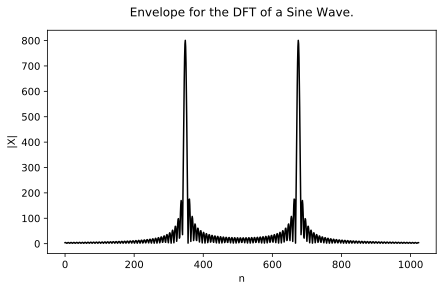

In [4]:
## N  = 1024
k  = np.linspace(-20,20,N)

f0 = 100

def L(i,f):
    l = 2*np.pi * ((i/N)-(f/fs))
    return l

TMP  = (1/(2j)) *( \
       np.exp(-1j * L(k,-f0) * ((N+1)/2)) \
       *(np.sin(np.pi*L(k,-f0)*(N/2)))/(np.sin(L(k,-f0))) \
       + \
       np.exp(-1j * L(k,+f0) * ((N+1)/2)) \
       *(np.sin(np.pi*L(k,+f0)*(N/2)))/(np.sin(L(k,+f0))))


plt.figure();
plt.suptitle("Envelope for the DFT of a Sine Wave.");
p1 = plt.plot(abs(TMP),'k');
plt.xlabel("$n$");
plt.ylabel("$|X|$");





<div class="alert alert-block alert-info">
    <b>Exercise:</b> Calculate the DFT spectrum of a cosine and compare it to the sine example above. What do the different outcomes show?
</div>

---


In [5]:

#plt.figure()
#p2 = plt.plot(f,np.imag(X),'gray')
#plt.xlabel("$f/Hz$");
#plt.ylabel('$\\Im(X)$');

#plt.figure()
#p2 = plt.plot(f,np.real(X),'gray')
#plt.xlabel("$f/Hz$");
#plt.ylabel('$\\Re(X)$');


---

## Absolute Representation

In many cases, the absolute values of DFT spectra will be shown only for the positive frequencies. This representation is used in most examples in the following sections. The sine wave becomes a single peak at its frequency:

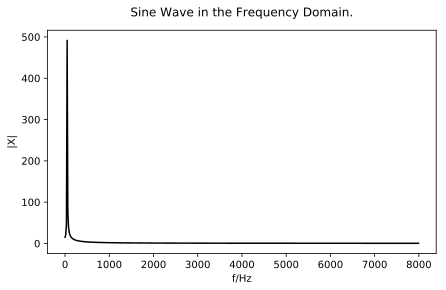

In [6]:

plt.figure()
plt.suptitle("Sine Wave in the Frequency Domain.");
p1 = plt.plot(f[0:round(N/2)],abs(X[0:round(N/2)]),'k')
plt.xlabel("$f/Hz$");
plt.ylabel("$|X|$");

----

## DFT Support Points 

For a DFT with $N$ points and a sampling rate $f_s$, 
the DFT bins $b[k]$ - or support points - are located at the following frequencies:

$$
b[k] = k \frac{f_s}{N}
$$

Only for harmonic signals located at these exact frequencies,
the DFT results can be expressed by the Dirac-Delta function.

# Links

This website visualizes the DFT very nicely for a better understanding:
https://jackschaedler.github.io/circles-sines-signals/dft_walkthrough.html


